In [19]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, QuantumRegister, ClassicalRegister, transpile, execute
from qiskit.tools.visualization import plot_histogram
from numpy import pi

In [2]:
def coined_walk_circuit(n_walker_qubits):
    walker_r = QuantumRegister(n_walker_qubits, name="w")
    coin_r = QuantumRegister(1, name="c")
    classic_r = ClassicalRegister(n_walker_qubits, name="output")
    qc = QuantumCircuit(walker_r, coin_r, classic_r)
    return qc, walker_r, coin_r, classic_r

In [41]:
def initialize_coined_walk_circuit(qc, walker_r, coin_r, initial_position, initial_coin_value):
    if initial_coin_value == 1:
        qc.x(coin_r)
    #qc.h(coin_r)
    #qc.s(coin_r)
    for i in range(n_walker_qubits):
        if initial_position & (1 << i):
            qc.x(walker_r[n_walker_qubits - i - 1])
    qc.barrier()
    return qc

In [4]:
def coined_walk_step(qc, walker_r, coin_r):
    # "Flip" the coin vector
    qc.h(coin_r)

    # Implement the Addition Operator
    for i in reversed(range(len(walker_r))):
        # Qubits with less significant bits than the current one
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r)  # The coin qubit is also used as a control
        qc.mcx(controls, walker_r[i])  # Multi-controlled X gate
        if i != 0:
            qc.x(walker_r[i])  # Flip the qubit
    
    # Switch the coin vector
    qc.x(coin_r)

    # Implement the Subtraction Operator
    for i in range(len(walker_r)):
        if i != 0:
            qc.x(walker_r[i])  # Reverse the flip
        # Qubits with less significant bits than the current one
        controls = [walker_r[v] for v in range(len(walker_r) - 1, i, -1)]
        controls.append(coin_r)  # The coin qubit is also used as a control
        qc.mcx(controls, walker_r[i])  # Multi-controlled X gate

    # Revert the switch of the coin vector
    qc.x(coin_r)

    return qc

{'101010': 153, '110110': 435, '011100': 75, '111110': 97, '100010': 69, '101110': 63, '110010': 298, '100110': 102, '111010': 1036, '010010': 102, '100100': 88, '111100': 650, '000110': 147, '001010': 128, '111000': 171, '110100': 79, '101100': 129, '011110': 82, '000010': 49, '011000': 47, '011010': 67, '101000': 138, '000100': 188, '001100': 72, '010000': 96, '100000': 68, '010100': 59, '010110': 50, '001000': 37, '110000': 172, '000000': 13, '001110': 40}


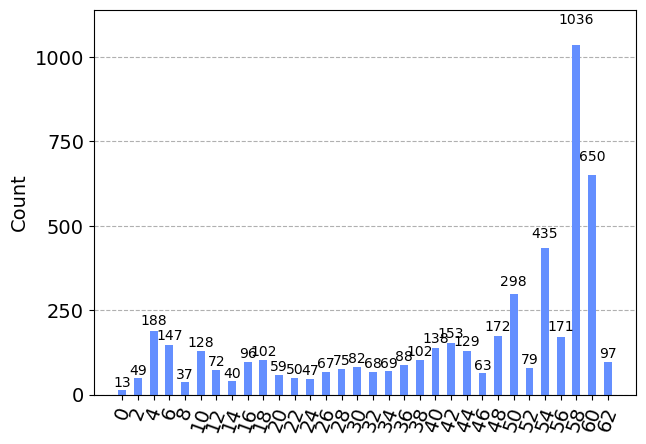

In [43]:
n_walker_qubits = 6
n_steps = 40
initial_position = 2 ** (n_walker_qubits - 1)  
initial_coin_value = 1  
n_runs = 5000 

qc, walker_r, coin_r, classic_r = coined_walk_circuit(n_walker_qubits)
qc = initialize_coined_walk_circuit(qc, walker_r, coin_r, initial_position, initial_coin_value)

for i in range(n_steps):
    step_gate = coined_walk_step(QuantumCircuit(walker_r, coin_r), walker_r, coin_r)
    qc.append(step_gate.to_gate(label=f"Step #{i + 1}"), walker_r[:] + coin_r[:])

qc.measure(walker_r, reversed(classic_r))
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots=n_runs).result().get_counts()
print(counts)
counts = {int(k, 2): v for k, v in counts.items()}
plot_histogram(counts) 